Analyzing Taylor Swift Splotify data from kaggle

**Exploratory Data Analysis**

This notebook focuses on the first step of any data science project.
EDA or exploratory Data Analysis is to get familiar to our data, identifying important columns, perform data manipulation and asking interesting questions from our data visualization tools.

Try doing valence analysis of each song, or find what makes a song popular.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
import seaborn as sns 

In [ ]:
swift_dataset = pd.read_csv('/spotify_taylorswift.csv',encoding='ISO-8859-1')

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
swift_dataset.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
0,0,Tim McGraw,Taylor Swift,Taylor Swift,2006-10-24,232106,49,0.580,0.575,0.491,0.0,0.1210,-6.462,0.0251,0.425,76.009
1,1,Picture To Burn,Taylor Swift,Taylor Swift,2006-10-24,173066,54,0.658,0.173,0.877,0.0,0.0962,-2.098,0.0323,0.821,105.586
2,2,Teardrops On My Guitar - Radio Single Remix,Taylor Swift,Taylor Swift,2006-10-24,203040,59,0.621,0.288,0.417,0.0,0.1190,-6.941,0.0231,0.289,99.953
3,3,A Place in this World,Taylor Swift,Taylor Swift,2006-10-24,199200,49,0.576,0.051,0.777,0.0,0.3200,-2.881,0.0324,0.428,115.028
4,4,Cold As You,Taylor Swift,Taylor Swift,2006-10-24,239013,50,0.418,0.217,0.482,0.0,0.1230,-5.769,0.0266,0.261,175.558


Finding most popular songs

In [53]:
swift_dataset.nlargest(5, ['popularity'])

,Unnamed: 0,name,album,artist,release_date,length,popularity,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,valence,tempo
60,60,Blank Space,1989 (Deluxe),Taylor Swift,2014-01-01,231826,82,0.760,0.10300,0.703,0.000000,0.0913,-5.412,0.0540,0.5700,95.997
64,64,Shake It Off,1989 (Deluxe),Taylor Swift,2014-01-01,219200,80,0.647,0.06470,0.800,0.000000,0.3340,-5.384,0.1650,0.9420,160.078
95,95,Lover,Lover,Taylor Swift,2019-08-23,221306,80,0.359,0.49200,0.543,0.000016,0.1180,-7.582,0.0919,0.4530,68.534
82,82,Delicate,reputation,Taylor Swift,2017-11-10,232253,78,0.750,0.21600,0.404,0.000357,0.0911,-10.178,0.0682,0.0499,95.045
106,106,You Need To Calm Down,Lover,Taylor Swift,2019-08-23,171360,78,0.771,0.00929,0.671,0.000000,0.0637,-5.617,0.0553,0.7140,85.026


In [57]:
swift_dataset.groupby('album')['popularity'].nlargest(1)

album                           
1989 (Deluxe)                60     82
Fearless (Taylor's Version)  150    76
Lover                        95     80
Red (Deluxe Edition)         41     72
Speak Now (Deluxe Package)   34     64
Taylor Swift                 2      59
evermore (deluxe version)    143    72
folklore (deluxe version)    112    65
reputation                   82     78
Name: popularity, dtype: int64

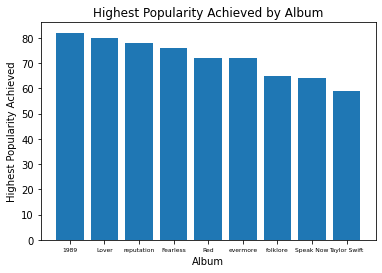

In [59]:
album = ["1989","Lover","reputation","Fearless","Red","evermore","folklore","Speak Now","Taylor Swift"]
maxpopularity = [82,80,78,76,72,72,65,64,59]

plt.bar(album, maxpopularity)
plt.title('Highest Popularity Achieved by Album')
plt.xlabel('Album')
plt.ylabel('Highest Popularity Achieved')
plt.xticks(fontsize=6)
plt.show()

In [61]:
swift_dataset.groupby('album')['length'].nlargest(1)

album                           
1989 (Deluxe)                71     271000
Fearless (Taylor's Version)  159    312107
Lover                        110    293453
Red (Deluxe Edition)         41     329160
Speak Now (Deluxe Package)   19     403887
Taylor Swift                 6      248106
evermore (deluxe version)    134    315146
folklore (deluxe version)    124    294520
reputation                   79     244826
Name: length, dtype: int64

In [64]:
correlation = swift_dataset[['length','popularity']].corr()
correlation

,length,popularity
length,1.000000,0.011772
popularity,0.011772,1.000000


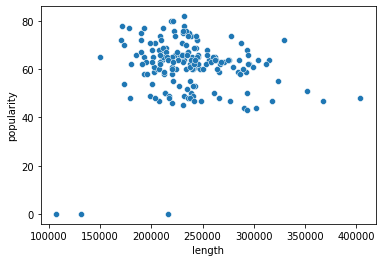

In [66]:
sns.scatterplot(x = swift_dataset['length'], y = swift_dataset['popularity'])

In [67]:
swift_dataset.groupby('album')['danceability'].nlargest(1)

album                           
1989 (Deluxe)                71     0.815
Fearless (Taylor's Version)  148    0.788
Lover                        98     0.897
Red (Deluxe Edition)         56     0.828
Speak Now (Deluxe Package)   22     0.715
Taylor Swift                 10     0.668
evermore (deluxe version)    141    0.689
folklore (deluxe version)    111    0.780
reputation                   85     0.800
Name: danceability, dtype: float64

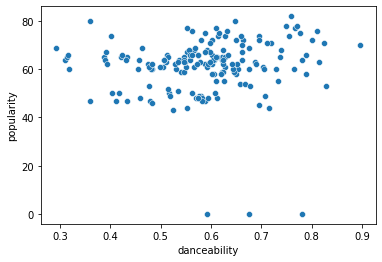

In [68]:
sns.scatterplot(x = swift_dataset['danceability'], y = swift_dataset['popularity'])

In [69]:
swift_dataset.groupby('album')['acousticness'].nlargest(1)

album                           
1989 (Deluxe)                75     0.829
Fearless (Taylor's Version)  167    0.849
Lover                        109    0.971
Red (Deluxe Edition)         58     0.664
Speak Now (Deluxe Package)   33     0.841
Taylor Swift                 12     0.637
evermore (deluxe version)    142    0.937
folklore (deluxe version)    126    0.964
reputation                   92     0.921
Name: acousticness, dtype: float64

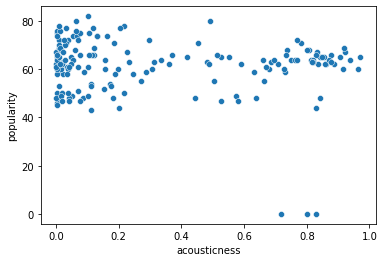

In [70]:
sns.scatterplot(x = swift_dataset['acousticness'], y = swift_dataset['popularity'])

In [71]:
swift_dataset.groupby('album')['energy'].nlargest(1)

album                           
1989 (Deluxe)                65     0.893
Fearless (Taylor's Version)  152    0.909
Lover                        108    0.830
Red (Deluxe Edition)         57     0.902
Speak Now (Deluxe Package)   26     0.944
Taylor Swift                 11     0.934
evermore (deluxe version)    139    0.730
folklore (deluxe version)    122    0.700
reputation                   90     0.789
Name: energy, dtype: float64

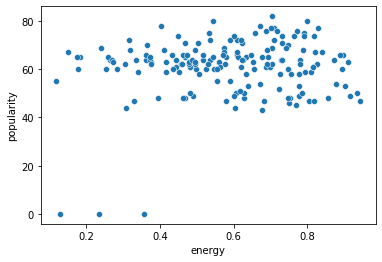

In [72]:
sns.scatterplot(x = swift_dataset['energy'], y = swift_dataset['popularity'])

In [73]:
swift_dataset.groupby('album')['instrumentalness'].nlargest(1)

album                           
1989 (Deluxe)                68     0.008680
Fearless (Taylor's Version)  169    0.000012
Lover                        99     0.006150
Red (Deluxe Edition)         48     0.033700
Speak Now (Deluxe Package)   21     0.001610
Taylor Swift                 11     0.000807
evermore (deluxe version)    139    0.179000
folklore (deluxe version)    113    0.004140
reputation                   82     0.000357
Name: instrumentalness, dtype: float64

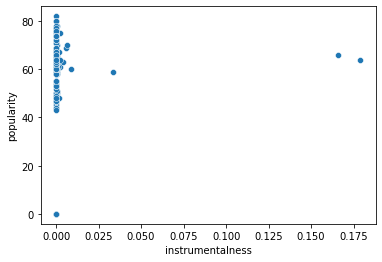

In [74]:
sns.scatterplot(x = swift_dataset['instrumentalness'], y = swift_dataset['popularity'])

In [75]:
swift_dataset.groupby('album')['liveness'].nlargest(1)

album                           
1989 (Deluxe)                77     0.657
Fearless (Taylor's Version)  162    0.343
Lover                        102    0.319
Red (Deluxe Edition)         50     0.311
Speak Now (Deluxe Package)   24     0.359
Taylor Swift                 10     0.329
evermore (deluxe version)    128    0.145
folklore (deluxe version)    112    0.260
reputation                   90     0.382
Name: liveness, dtype: float64

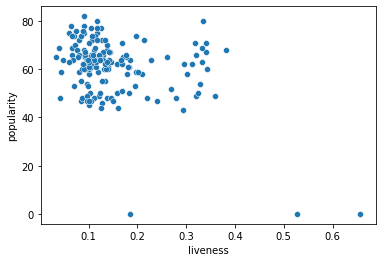

In [76]:
sns.scatterplot(x = swift_dataset['liveness'], y = swift_dataset['popularity'])

In [77]:
swift_dataset.groupby('album')['loudness'].nlargest(1)

album                           
1989 (Deluxe)                59    -4.762
Fearless (Taylor's Version)  152   -3.669
Lover                        108   -4.105
Red (Deluxe Edition)         38    -4.267
Speak Now (Deluxe Package)   26    -2.641
Taylor Swift                 1     -2.098
evermore (deluxe version)    143   -6.524
folklore (deluxe version)    111   -6.942
reputation                   90    -5.986
Name: loudness, dtype: float64

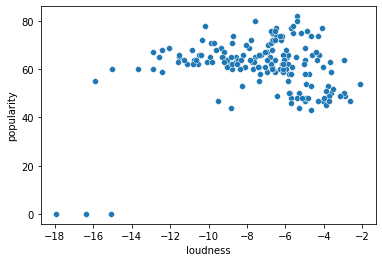

In [78]:
sns.scatterplot(x = swift_dataset['loudness'], y = swift_dataset['popularity'])

In [79]:
swift_dataset.groupby('album')['speechiness'].nlargest(1)

album                           
1989 (Deluxe)                76     0.9120
Fearless (Taylor's Version)  152    0.0628
Lover                        93     0.5190
Red (Deluxe Edition)         44     0.0916
Speak Now (Deluxe Package)   24     0.0887
Taylor Swift                 11     0.0646
evermore (deluxe version)    141    0.2450
folklore (deluxe version)    125    0.0821
reputation                   88     0.1960
Name: speechiness, dtype: float64

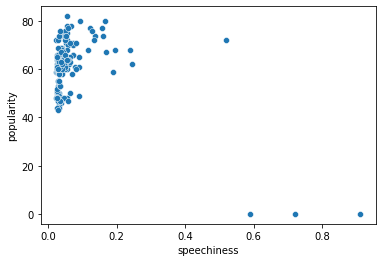

In [80]:
sns.scatterplot(x = swift_dataset['speechiness'], y = swift_dataset['popularity'])

In [81]:
swift_dataset.groupby('album')['valence'].nlargest(1)

album                           
1989 (Deluxe)                64     0.942
Fearless (Taylor's Version)  148    0.797
Lover                        100    0.865
Red (Deluxe Edition)         45     0.928
Speak Now (Deluxe Package)   21     0.840
Taylor Swift                 1      0.821
evermore (deluxe version)    141    0.920
folklore (deluxe version)    113    0.701
reputation                   83     0.506
Name: valence, dtype: float64

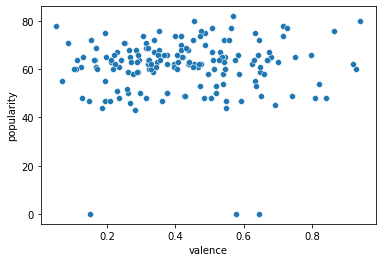

In [82]:
sns.scatterplot(x = swift_dataset['valence'], y = swift_dataset['popularity'])

In [83]:
swift_dataset.groupby('album')['tempo'].nlargest(1)

album                           
1989 (Deluxe)                72     184.014
Fearless (Taylor's Version)  159    200.391
Lover                        104    207.476
Red (Deluxe Edition)         47     157.043
Speak Now (Deluxe Package)   28     203.959
Taylor Swift                 14     199.997
evermore (deluxe version)    129    171.319
folklore (deluxe version)    127    179.947
reputation                   86     172.054
Name: tempo, dtype: float64

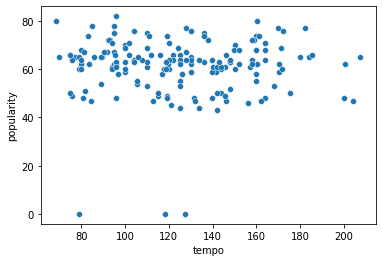

In [84]:
sns.scatterplot(x = swift_dataset['tempo'], y = swift_dataset['popularity'])